<a href="https://colab.research.google.com/github/mattnadolny/PRA3024/blob/main/Gravitational_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1

Identify a loud binary black hole signal in white, Gaussian noise.

Use the data file "challenge1.gwf". The channel name is "H1:CHALLENGE1".

The data are white, Gaussian noise containing a simulated BBH signal.

Do the following:
1. Load the data into memory. What are the sampling rate and duration of the data?
2. Plot the data in the time-domain.
3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal. What is the time of the merger? --> Ans. -64s


In [2]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install matplotlib==3.1.3

# -- Click "restart runtime" in the runtime menu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [23]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')


--2022-02-15 19:43:57--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.2’

challenge1.gwf.2    100%[===================>]   3.84M  2.37MB/s    in 1.6s    

2022-02-15 19:44:00 (2.37 MB/s) - ‘challenge1.gwf.2’ saved [4025674/4025674]



In [4]:
# Print the data
print(gwpy_strain) 

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


In [5]:
# Retrive the sample rate and duration
samplerate = gwpy_strain.sample_rate
duration = gwpy_strain.duration
print('Sample rate: ', samplerate)
print('Duration: ', duration)

Sample rate:  4096.0 Hz
Duration:  128.0 s


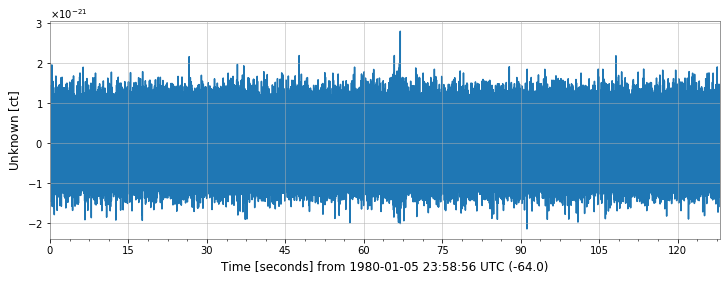

In [6]:
# Make a plot data vs timeframe
%matplotlib inline       
plot = gwpy_strain.plot()    
plot.show()


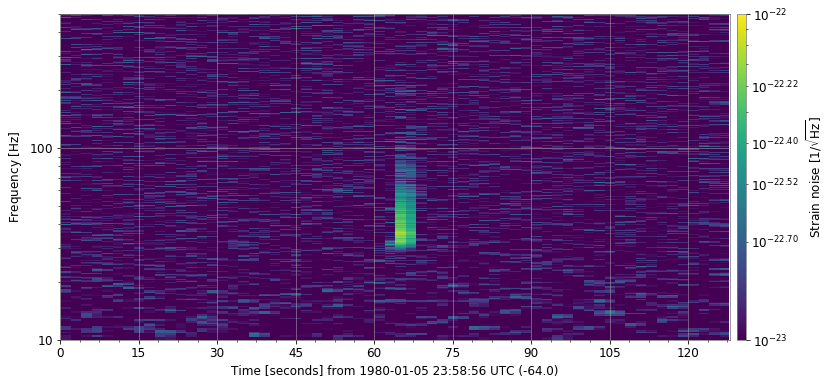

In [24]:
# Plot spectogram 
sgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = sgram.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 500)
ax.colorbar(
    clim=(1e-22, 1e-23),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)


The time of the merger equals -64s

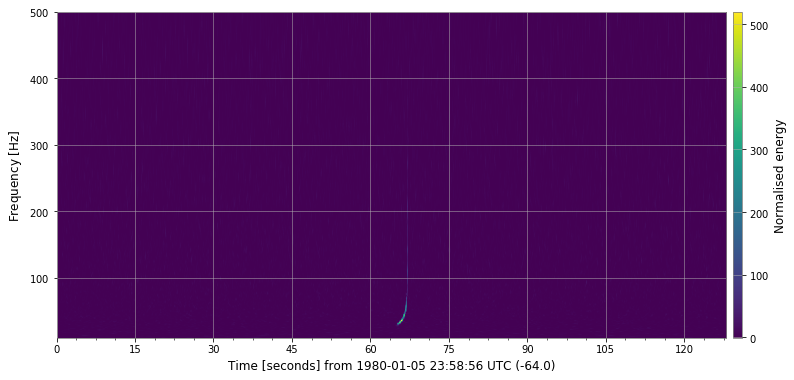

In [8]:
# Apply Q-transform filter 
  # allowes easier evaluation of very short frequency changes

hq = gwpy_strain.q_transform(frange=(10, 500), qrange=(20,160)) #q transform
plot = hq.plot()
plot.colorbar(label="Normalised energy")

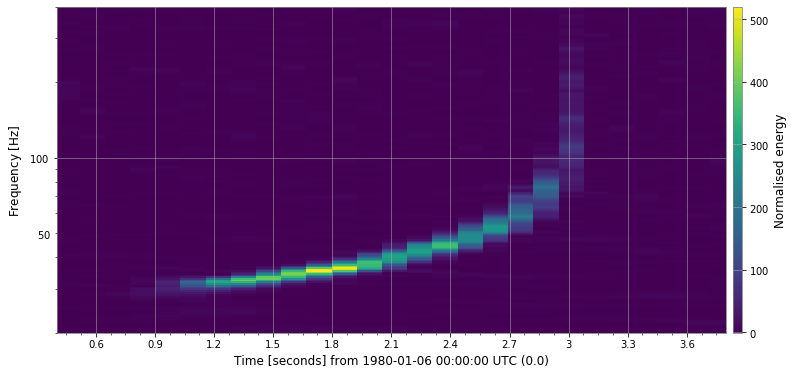

In [9]:
# Adjust the visibility of the data 
# setting limits to range and scale change
hq = gwpy_strain.q_transform(frange=(10, 500), qrange=(20,160))
plot = hq.plot()
plot.colorbar(label="Normalised energy")
ax = plot.gca()
ax.set_ylim(20, 400)  
ax.set_xlim(0.4, 3.8)  
ax.set_yscale("log")   

# Challenge 2

Signal in colored, Gaussian noise.

Use the data file "challenge2.gwf", with channel name "H1:CHALLENGE2"

The data contain a BBH signal with m1=m2=30 solar masses, spin = 0.

1. What is the approximative time of the merger? (Hint: a plot of the q-transform could help) ---> Ans: 49s
2. Generate a time-domain template waveform using approximate "SEOBNRv4_opt". with the same parameters as above. Plot this waveform.
3. Calculate a PSD of the data, and plot this on a log-log scale. Use axes ranging from 20 Hz up to the Nyquist frequency.
4. Use the template waveform and PSD to calculate the SNR time series. Plot the SNR time-series.
5. What is the matched filter SNR of the signal? ---> Ans: 

Data files may be downloaded using this link:


In [10]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf


--2022-02-15 19:30:08--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  2.37MB/s    in 1.6s    

2022-02-15 19:30:11 (2.37 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



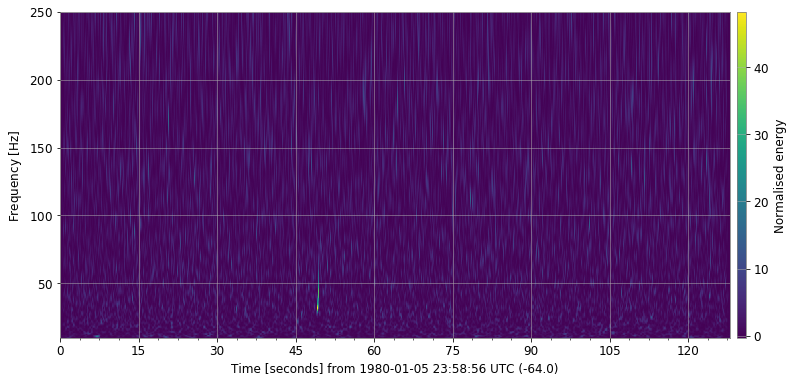

In [28]:
# Plot the spectogram with Q-transform filter to identify if there is a signal
gwpy_strain2 = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

pycbc_strain2 = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

hq2 = gwpy_strain2.q_transform(frange=(10, 250), qrange=(20,100))
plot = hq2.plot()
plot.colorbar(label="Normalised energy")


The signal is visible around 50s

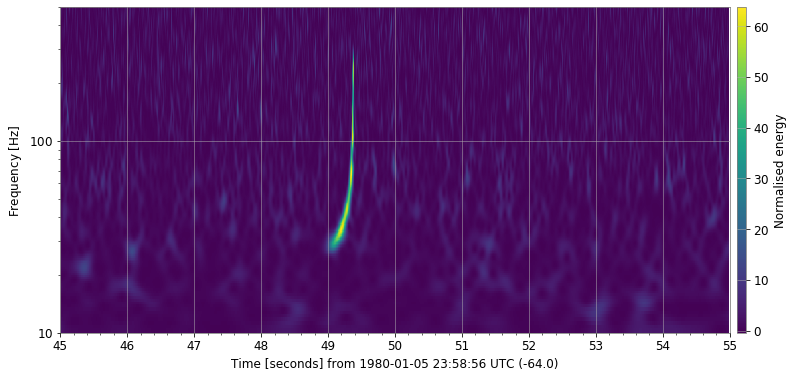

In [30]:
# Zoom in
epoch = gwpy_strain2.epoch
hq = gwpy_strain2.q_transform(frange=(10, 500), qrange=(10, 300), outseg=(-19,-9)) 
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_epoch(epoch)
ax.colorbar(label="Normalised energy")

The signal is clearly visible, starting at 49s

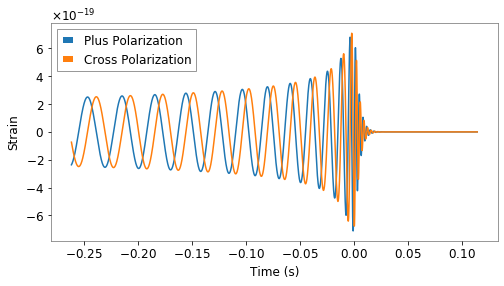

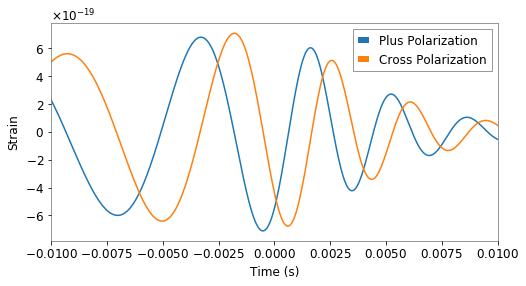

In [35]:
# Generate and plot the time-domain template waveform

%matplotlib inline
from pycbc.waveform import get_td_waveform
import pylab

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/16384,
                         f_lower=30,
                         spin1z=0,
                         spin2z=0,)   

pylab.figure(figsize=pylab.figaspect(0.5))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

pylab.figure(figsize=pylab.figaspect(0.5))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-0.01,0.01)
pylab.legend()
pylab.grid()
pylab.show()


The polarizations differ only by the phase.

In [50]:
samplerate = pycbc_strain2.sample_rate
nfrequency = samplerate/2
print('The sampling rate is', samplerate, 'and the Nyquist frequency is', nfrequency, '.')


The sampling rate is 4096.0 and the Nyquist frequency is 2048.0 .


Nyquist frequency is a characteristic of a sampler, which converts a continuous function or signal into a discrete sequence. In units of cycles per second (Hz), its value is one-half of the sampling rate (samples per second).

Welch's method is used to obtain a PSD estimate and it uses 4 second samples

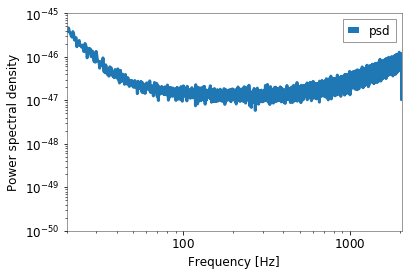

In [51]:
psd = pycbc_strain2.psd(4)
# plot it:

pylab.loglog(psd.sample_frequencies, psd, linewidth=3, label='psd')
pylab.xlim(xmin=20, xmax=2048)
pylab.ylim(1e-50, 1e-45)
pylab.xlabel('Frequency [Hz]')
pylab.ylabel('Power spectral density')
pylab.legend()
pylab.grid()
pylab.show()

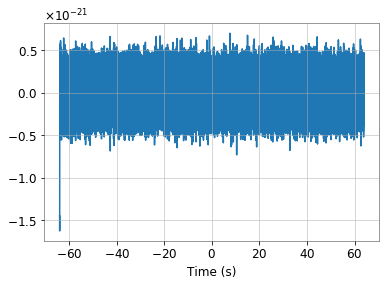

In [54]:
#Downsample to 2048Hz and plot
from pycbc import frame
from pycbc.filter import matched_filter
import numpy
import pylab
from pycbc.filter import resample_to_delta_t, highpass

# Remove the low frequency content and downsample the data to 2048Hz
pycbc_strain2 = highpass(pycbc_strain2, 15.0)
pycbc_strain2 = resample_to_delta_t(pycbc_strain2, 1.0/2048)

pylab.plot(pycbc_strain2.sample_times, pycbc_strain2)
pylab.xlabel('Time (s)')
pylab.show()

There is a spikie visible, caused by the application of the filter and has to be removed (conditioned)

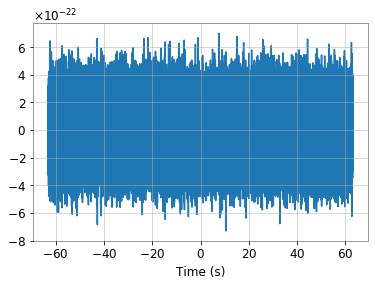

In [57]:
conditioned = pycbc_strain2.crop(1,1) # cropping first and last second of the data

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [60]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency. 
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)


[1.53474039e-40 1.49976814e-40 1.40498692e-40 ... 2.40057490e-48
 2.39431726e-48 2.39223289e-48]


In [61]:
from pycbc.waveform import get_td_waveform

m = 36 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match our data
hp.resize(len(conditioned))

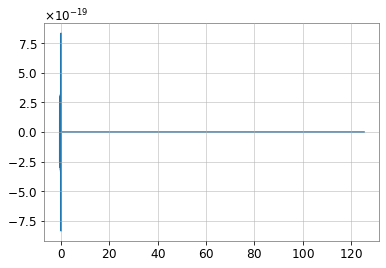

In [62]:
pylab.plot(hp.sample_times, hp)

Text(0, 0.5, 'Strain')

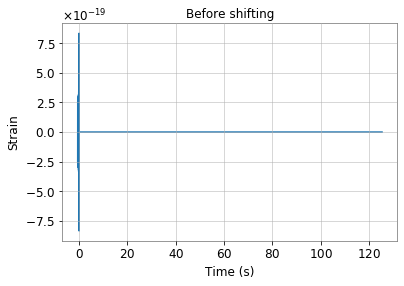

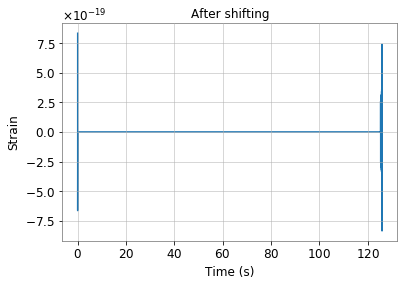

In [63]:
# Let's plot the signal before and after shifting

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')


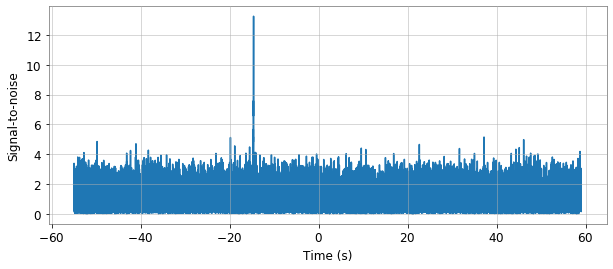

We found a signal at -14.6357421875s with SNR 13.24875707770401


In [64]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why are we taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

# Challenge 3

Use the data file "challenge 3.gwf" with channel "H1:CHALLENGE3"

These are real LIGO data from O2, though we've adjusted the time labels and added some simulated signals.

The data contain a loud simulated signal with m1 = m2 = 10 solar masses.

1. What is the merger time of this signal?
2. What is the matched-filter SNR of this signal?


In [66]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu
! pip install matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [65]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf

--2022-02-15 22:30:53--  https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256815066 (245M)
Saving to: ‘challenge3.gwf’

challenge3.gwf      100%[===================>] 244.92M  6.89MB/s    in 36s     

2022-02-15 22:31:29 (6.88 MB/s) - ‘challenge3.gwf’ saved [256815066/256815066]



In [69]:
gwpy_strain3 = TimeSeries.read('challenge3.gwf', channel="H1:CHALLENGE3") 
pycbc_strain3 = frame.read_frame('challenge3.gwf', 'H1:CHALLENGE3')


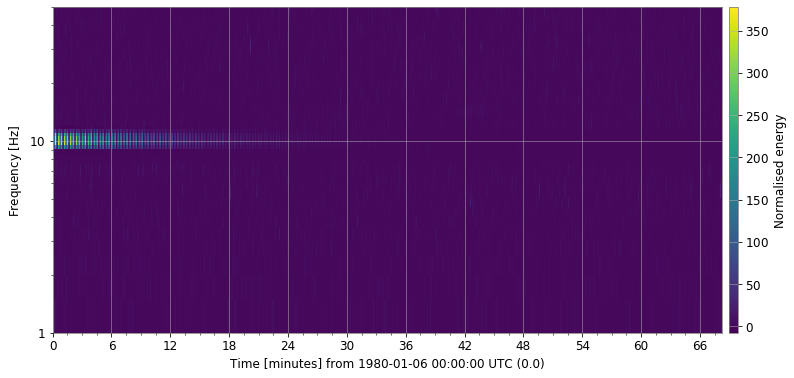

In [73]:
epoch = gwpy_strain3.epoch
hq = gwpy_strain3.q_transform(frange=(1, 50), qrange=(4, 30)) 
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_epoch(epoch)
ax.colorbar(label="Normalised energy")

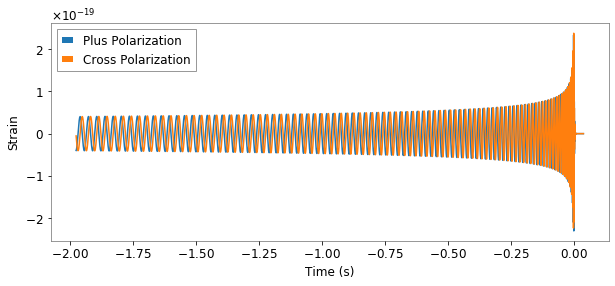

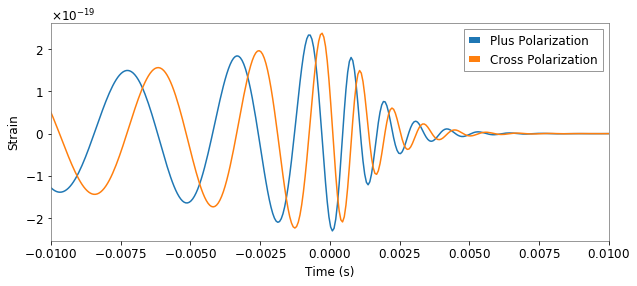

In [74]:
%matplotlib inline
from pycbc.waveform import get_td_waveform
import pylab

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30,
                         spin1z=0,
                         spin2z=0)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

In [77]:
samplerate = pycbc_strain3.sample_rate
nfrequency = samplerate/2
samplelength = 4
print('The sampling rate is', samplerate, 'and the Nyquist frequency is', nfrequency, '.')

The sampling rate is 4096.0 and the Nyquist frequency is 2048.0 .


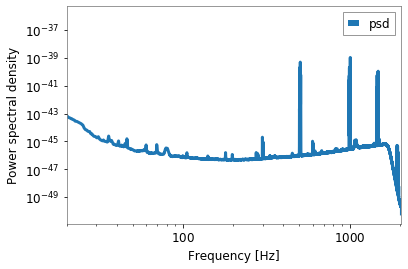

In [79]:
psd = pycbc_strain3.psd(samplelength)

pylab.loglog(psd.sample_frequencies, psd, linewidth=3, label='psd')
pylab.xlim(xmin=20, xmax=2048)
pylab.xlabel('Frequency [Hz]')
pylab.ylabel('Power spectral density')
pylab.legend()
pylab.grid()
pylab.show()


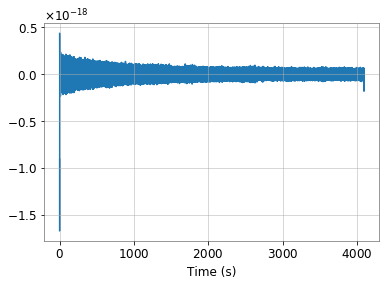

In [81]:
from pycbc import frame
from pycbc.filter import matched_filter
import numpy
import pylab
from pycbc.filter import resample_to_delta_t, highpass

# Remove the low frequency content and downsample the data to 2048Hz
pycbc_strain3 = highpass(pycbc_strain3, 15.0)
pycbc_strain3 = resample_to_delta_t(pycbc_strain3, 1.0/2048)

pylab.plot(pycbc_strain3.sample_times, pycbc_strain3)
pylab.xlabel('Time (s)')
pylab.show()

Delete the peaks at the beginning and end of the data (coming from the use of filter)

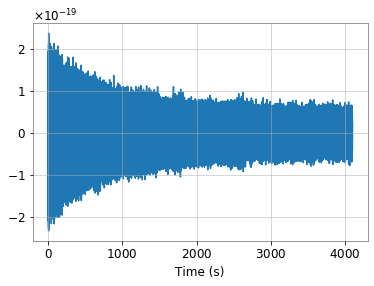

In [82]:
conditioned = pycbc_strain3.crop(1,1)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [83]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd,
                                  int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

In [84]:
from pycbc.waveform import get_td_waveform

m = 10 # Solar masses
s = 0 # the spin is 0
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20,
                     spin1z=s,
                     spin2z=s)

# Resize the vector to match our data
hp.resize(len(conditioned))


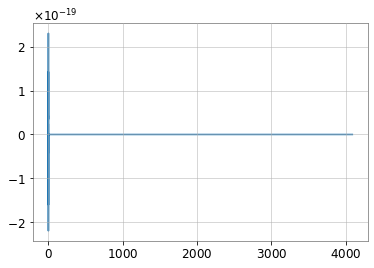

In [85]:
pylab.plot(hp.sample_times, hp)


Text(0, 0.5, 'Strain')

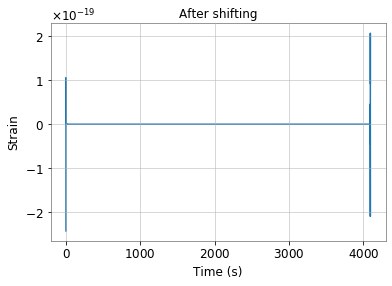

In [86]:
template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

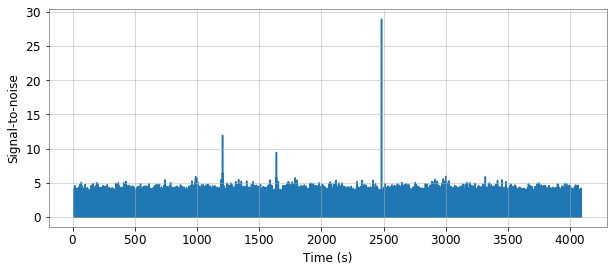

We found a signal at 2483.96728515625s with SNR 28.905528226127448


In [91]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4)
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))



# Challenge 4

1. Load the data of the LIGO Hanford detector from [2]. Plot the noise power spectral density (PSD) of that data. Test whether there is any gravitational wave signal present in the data or not? For this test, you can assume the GW signals can produce only from equal mass binary systems with a range between 5 to 10. We assume a threshold on matched filter SNR of 8 to claim detection of GW.
2. Whiten the above data using its noise PSD. You can use PyCBC based function of the Welch method to estimate the PSD. Construct a histogram of the whitened data and show that the whiten data follows a Gaussian distribution with zero mean.


In [92]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu
! pip install matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [93]:
from google.colab import drive
from gwpy.timeseries import TimeSeries
import pycbc
from pycbc import frame

drive.mount('/content/drive')

pycbc_strain = pycbc.types.load_timeseries('/content/drive/MyDrive/GW_noisedata-2.npy')

Mounted at /content/drive


In [96]:
from pycbc.filter import matched_filter
from pycbc.waveform import get_td_waveform
import pylab
from pycbc import frame
from pycbc.filter import matched_filter
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
import numpy as np


m = np.arange(5,10,0.1)
m1 = m2 = m
print(m)

samplerate = pycbc_strain.sample_rate
duration = pycbc_strain.duration
print('Sample rate: ', samplerate)
print('Duration: ', duration)

[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5
 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7
 9.8 9.9]
Sample rate  4096.0
Duration  256.0


In [98]:
listsnr = np.zeros((len(m), 2), float)

for i in range(0, len(m)):
  hp = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m[i],
                     mass2=m[i],
                     delta_t=pycbc_strain.delta_t,
                     f_lower=15)


In [101]:
pycbc_strain = highpass(pycbc_strain, 15.0)
pycbc_strain = resample_to_delta_t(pycbc_strain, 1.0/2048)
conditioned = pycbc_strain.crop(3,3)



In [102]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
psd = pycbc_strain.psd(4)
# Estimate the power spectral density

# We use 4 second samples of our time series since the data length is 128 which is divisible by 4
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency. 
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

In [103]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
psd = pycbc_strain.psd(4)
# Estimate the power spectral density

# We use 4 second samples of our time series since the data length is 128 which is divisible by 4
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency. 
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

In [104]:
data_whitened = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()


In [106]:
sum = data_whitened.sum()
mean = sum/len(data_whitened)
print('Mean: ', mean)

Mean:  -4.796356825210957e-06


(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        8.00000e+00, 1.01000e+02, 7.35000e+02, 3.66800e+03,
        1.36600e+04, 3.80680e+04, 7.60120e+04, 1.08770e+05,
        1.13477e+05, 8.56220e+04, 4.68100e+04, 1.84460e+04,
        5.32600e+03, 1.07300e+03, 1.87000e+02, 1.90000e+01,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.0000

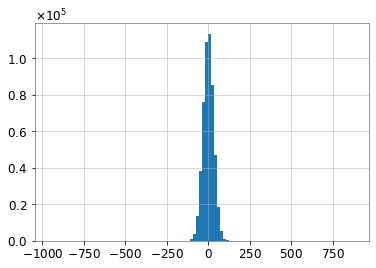

In [107]:
import matplotlib.pyplot as plot
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 100
plot = plot.hist(data_whitened, n_bins)
plot